In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Mg all data.xlsx')
df

,Time(min),Scanspeed(mm/s),Fluence (J/cm2),Repetition rate(kHz),Pulsewidth,Power %,DLS (nm),UV peak(nm),UV VIS
0,2,3000,1.83,10,0.6,90,232.5,203.0,0.677
1,5,3000,1.83,10,0.6,90,117.6,203.5,0.580
2,25,3000,1.83,10,0.6,90,78.2,205.0,1.695
3,2,3250,1.83,10,0.6,90,239.8,202.5,0.438
4,5,3250,1.83,10,0.6,90,146.3,205.0,0.833
...,...,...,...,...,...,...,...,...,...
76,5,3250,1.91,10,0.6,100,222.6,202.5,0.632
77,25,3250,1.91,10,0.6,100,106.2,206.5,2.132
78,2,3500,1.91,10,0.6,100,162.4,202.0,0.585
79,5,3500,1.91,10,0.6,100,222.6,203.5,0.987


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time(min)             81 non-null     int64  
 1   Scanspeed(mm/s)       81 non-null     int64  
 2   Fluence (J/cm2)       81 non-null     float64
 3   Repetition rate(kHz)  81 non-null     int64  
 4   Pulsewidth            81 non-null     float64
 5   Power %               81 non-null     int64  
 6   DLS (nm)              81 non-null     float64
 7   UV peak(nm)           81 non-null     float64
 8   UV VIS                81 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 5.8 KB


In [4]:
df.isnull().sum()

Time(min)               0
Scanspeed(mm/s)         0
Fluence (J/cm2)         0
Repetition rate(kHz)    0
Pulsewidth              0
Power %                 0
DLS (nm)                0
UV peak(nm)             0
UV VIS                  0
dtype: int64

In [5]:
df.describe() #description of data

,Time(min),Scanspeed(mm/s),Fluence (J/cm2),Repetition rate(kHz),Pulsewidth,Power %,DLS (nm),UV peak(nm),UV VIS
count,81.000000,81.000000,81.000000,81.0,8.100000e+01,81.000000,81.000000,81.000000,81.000000
mean,10.666667,3250.000000,1.873333,10.0,6.000000e-01,95.000000,134.307037,203.654321,1.019654
std,10.272536,205.395959,0.033204,0.0,8.937123e-16,4.107919,42.258972,1.495079,0.693958
min,2.000000,3000.000000,1.830000,10.0,6.000000e-01,90.000000,52.700000,201.000000,0.219000
25%,2.000000,3000.000000,1.830000,10.0,6.000000e-01,90.000000,106.200000,202.500000,0.462000
50%,5.000000,3250.000000,1.880000,10.0,6.000000e-01,95.000000,127.400000,203.500000,0.708000
75%,25.000000,3500.000000,1.910000,10.0,6.000000e-01,100.000000,161.500000,204.500000,1.826000
max,25.000000,3500.000000,1.910000,10.0,6.000000e-01,100.000000,239.800000,207.500000,2.541000


In [6]:
df.nunique() #to see unique values

Time(min)                3
Scanspeed(mm/s)          3
Fluence (J/cm2)          3
Repetition rate(kHz)     1
Pulsewidth               1
Power %                  3
DLS (nm)                75
UV peak(nm)             14
UV VIS                  76
dtype: int64

In [7]:
#Group by time
grouped_time = df.groupby('Time(min)')[['DLS (nm)', 'UV peak(nm)', 'UV VIS']].mean()
grouped_time

,DLS (nm),UV peak(nm),UV VIS
Time(min),,,
2,153.318519,202.870370,0.434741
5,140.107407,203.092593,0.702148
25,109.495185,205.000000,1.922074


In [8]:
#Group by scanspeed
grouped_scanspeed = df.groupby('Scanspeed(mm/s)')[['DLS (nm)', 'UV peak(nm)', 'UV VIS']].mean()
grouped_scanspeed

,DLS (nm),UV peak(nm),UV VIS
Scanspeed(mm/s),,,
3000,130.191481,203.592593,1.005963
3250,143.596296,203.407407,0.976667
3500,129.133333,203.962963,1.076333


In [9]:
#Group by power
grouped_power = df.groupby('Power %')[['DLS (nm)', 'UV peak(nm)', 'UV VIS']].mean()
grouped_power

,DLS (nm),UV peak(nm),UV VIS
Power %,,,
90,141.669259,203.851852,0.964926
95,129.896296,203.314815,1.019741
100,131.355556,203.796296,1.074296


In [10]:
#Group by fluence
grouped_fluence = df.groupby('Fluence (J/cm2)')[['DLS (nm)', 'UV peak(nm)', 'UV VIS']].mean()
grouped_fluence

,DLS (nm),UV peak(nm),UV VIS
Fluence (J/cm2),,,
1.83,141.669259,203.851852,0.964926
1.88,129.896296,203.314815,1.019741
1.91,131.355556,203.796296,1.074296


Interpretation:
<li>By comparing the fluence and power, correspondings 90% to 1.83, 95% to 1.88 and 100% to 1.91 </li>

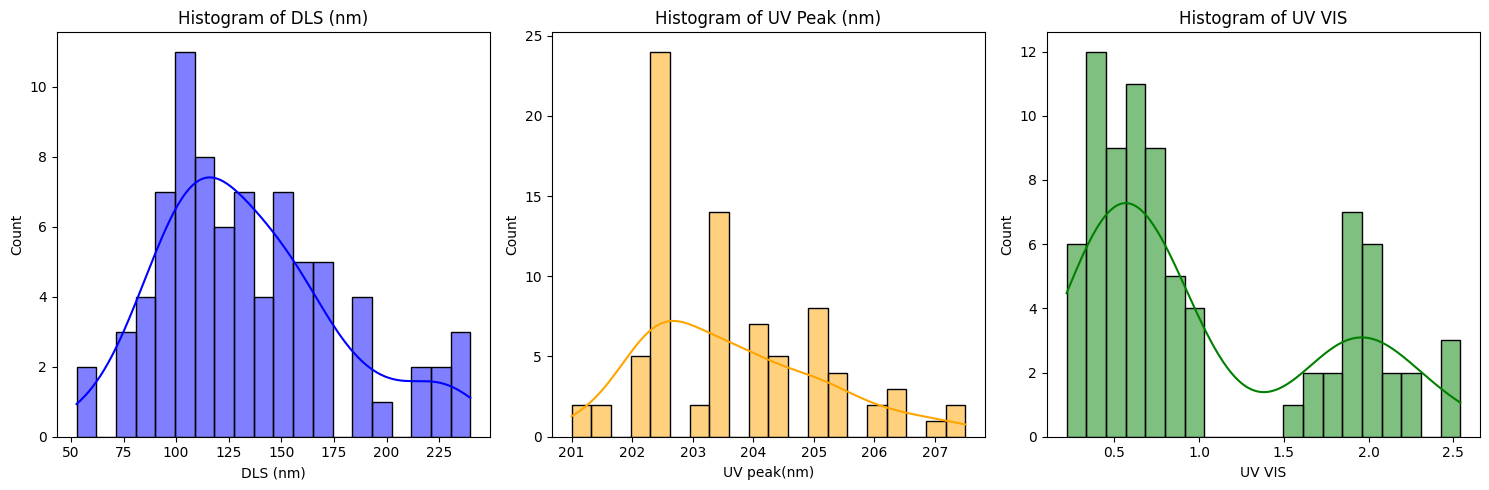

In [12]:
plt.figure(figsize=(15, 5))

# Histogram for DLS (nm)
plt.subplot(1, 3, 1)
sns.histplot(df['DLS (nm)'], bins=20, kde=True, color='blue')
plt.title('Histogram of DLS (nm)')

# Histogram for UV peak(nm)
plt.subplot(1, 3, 2)
sns.histplot(df['UV peak(nm)'], bins=20, kde=True, color='orange')
plt.title('Histogram of UV Peak (nm)')

# Histogram for UV VIS
plt.subplot(1, 3, 3)
sns.histplot(df['UV VIS'], bins=20, kde=True, color='green')
plt.title('Histogram of UV VIS')

plt.tight_layout()
plt.show()

Interpreatation:
<li>DLS is slightly right skewed with normal distribution</li>
<li>UV Peak with right skewed</li>
<li>UV Vis is bimodal distribution</li>

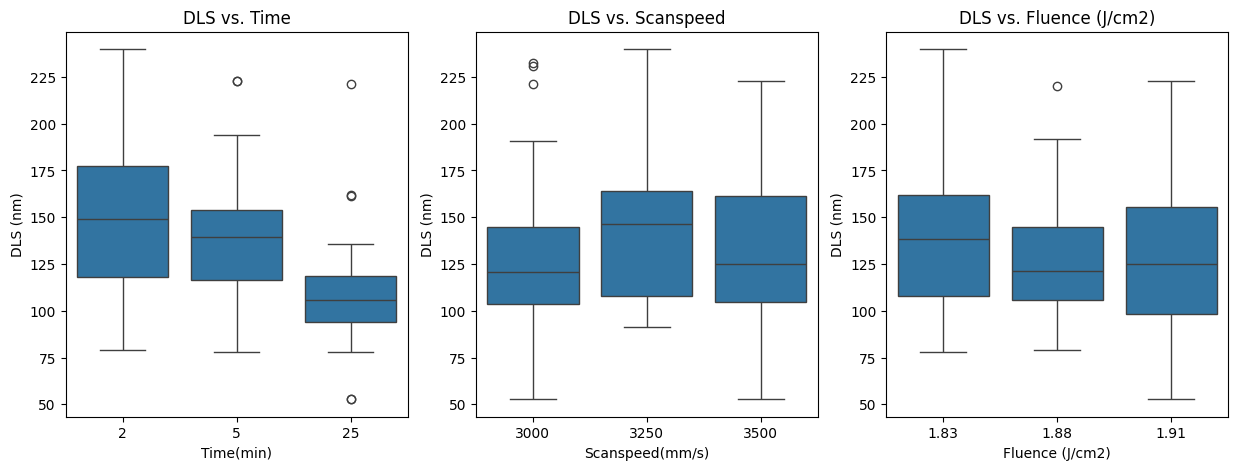

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,x='Time(min)', y='DLS (nm)')
plt.title('DLS vs. Time')
plt.subplot(1, 3, 2)
sns.boxplot(data=df,x='Scanspeed(mm/s)', y='DLS (nm)')
plt.title('DLS vs. Scanspeed')
plt.subplot(1, 3, 3)
sns.boxplot(data=df,x='Fluence (J/cm2)', y='DLS (nm)')
plt.title('DLS vs. Fluence (J/cm2)')
plt.show()

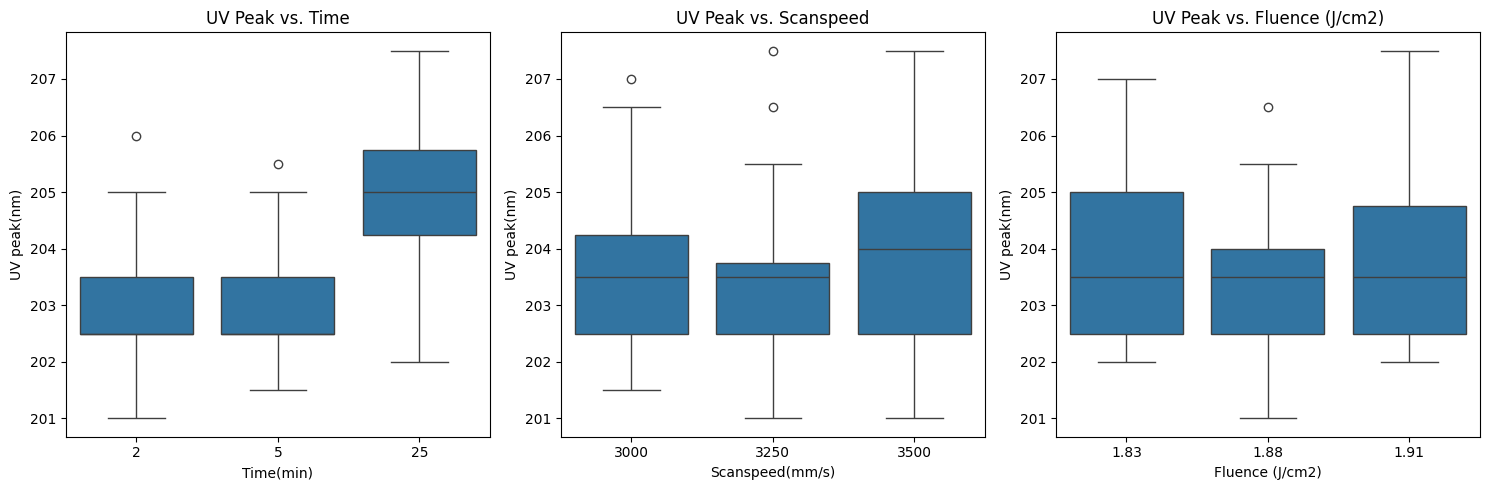

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,x='Time(min)', y='UV peak(nm)')
plt.title('UV Peak vs. Time')
plt.subplot(1, 3, 2)
sns.boxplot(data=df,x='Scanspeed(mm/s)', y='UV peak(nm)')
plt.title('UV Peak vs. Scanspeed')
plt.subplot(1, 3, 3)
sns.boxplot(data=df,x='Fluence (J/cm2)', y='UV peak(nm)')
plt.title('UV Peak vs. Fluence (J/cm2)')
plt.tight_layout()
plt.show()

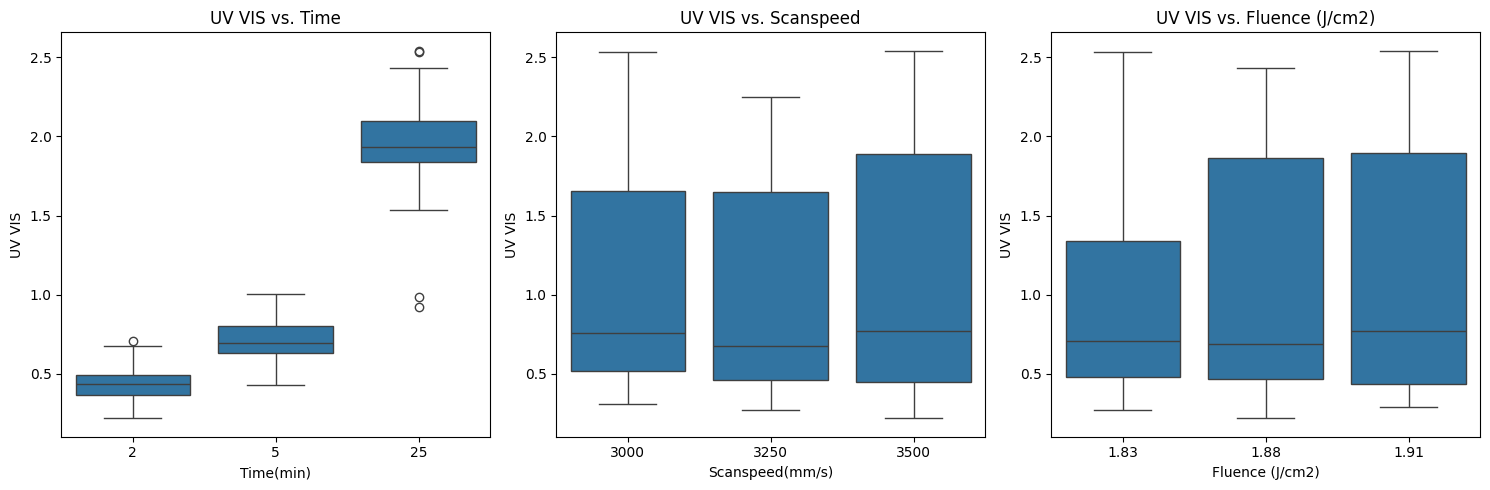

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df,x='Time(min)', y='UV VIS')
plt.title('UV VIS vs. Time')
plt.subplot(1, 3, 2)
sns.boxplot(data=df,x='Scanspeed(mm/s)', y='UV VIS')
plt.title('UV VIS vs. Scanspeed')
plt.subplot(1, 3, 3)
sns.boxplot(data=df,x='Fluence (J/cm2)', y='UV VIS')
plt.title('UV VIS vs. Fluence (J/cm2)')
plt.tight_layout()
plt.show()

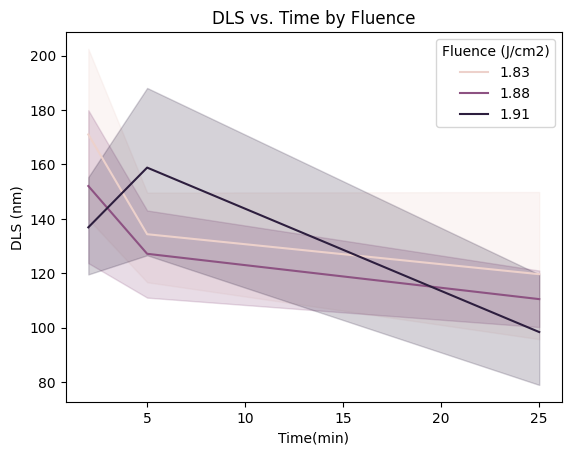

In [17]:
sns.lineplot(data=df,x='Time(min)',y='DLS (nm)',hue='Fluence (J/cm2)')
plt.title('DLS vs. Time by Fluence')
plt.show()

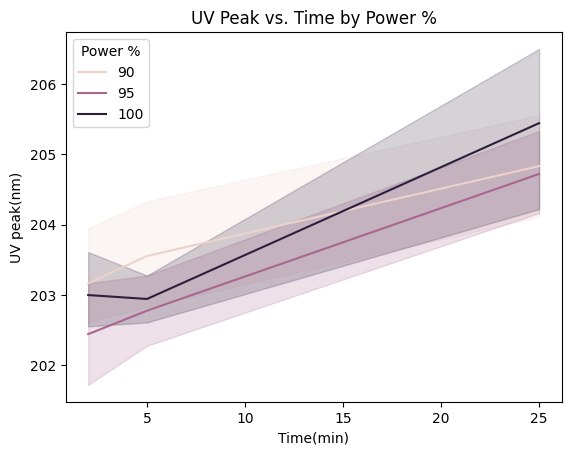

In [18]:
sns.lineplot(data=df,x='Time(min)', y='UV peak(nm)', hue='Power %')
plt.title('UV Peak vs. Time by Power %')
plt.show()

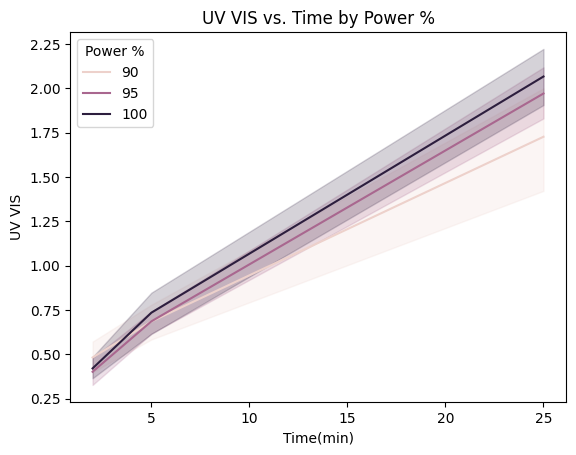

In [19]:
sns.lineplot(data=df,x='Time(min)', y='UV VIS', hue='Power %')
plt.title('UV VIS vs. Time by Power %')
plt.show()

Interpretation:
<li>After 5 min all the parameters showed increase in value for all parameters</li>

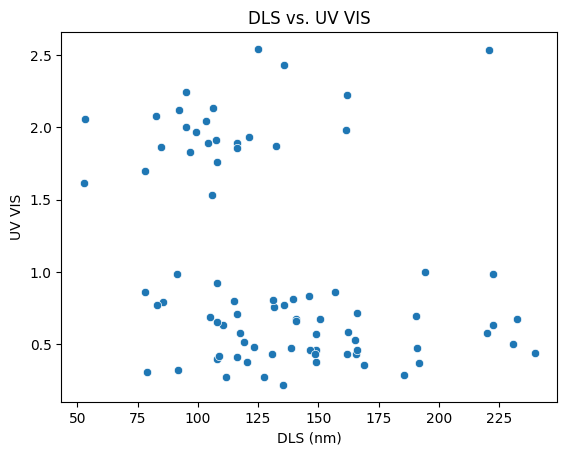

In [21]:
sns.scatterplot(data=df,x='DLS (nm)', y='UV VIS')
plt.title('DLS vs. UV VIS')
plt.xlabel('DLS (nm)')
plt.ylabel('UV VIS')
plt.show()

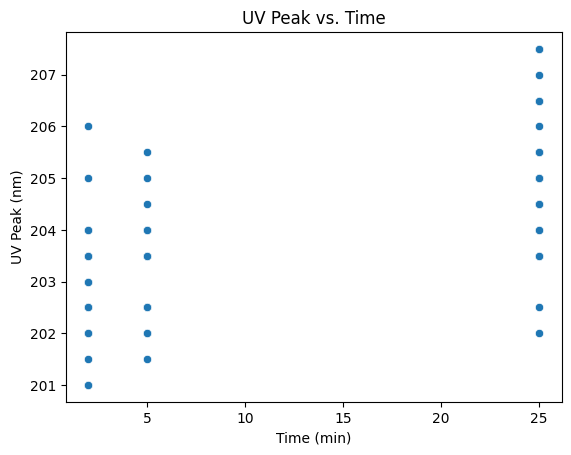

In [22]:
sns.scatterplot(data=df,x='Time(min)', y='UV peak(nm)')
plt.title('UV Peak vs. Time')
plt.xlabel('Time (min)')
plt.ylabel('UV Peak (nm)')
plt.show()

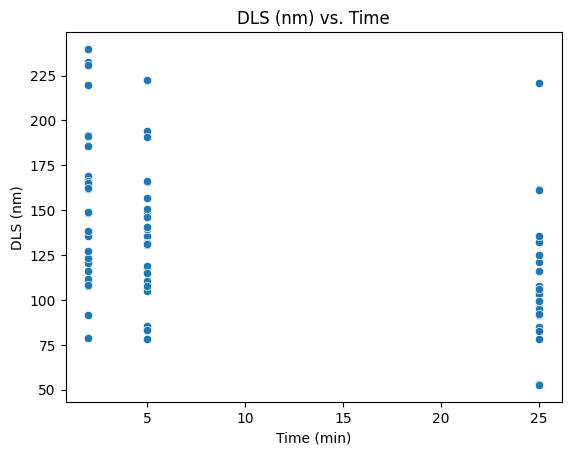

In [23]:
sns.scatterplot(data=df,x='Time(min)', y='DLS (nm)')
plt.title('DLS (nm) vs. Time')
plt.xlabel('Time (min)')
plt.ylabel('DLS (nm)')
plt.show()

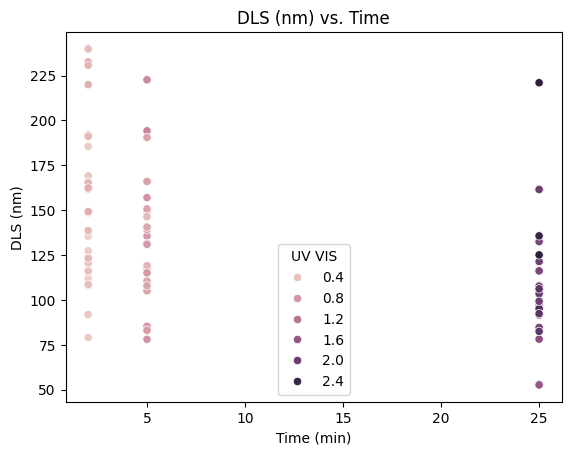

In [24]:
sns.scatterplot(data=df,x='Time(min)', y='DLS (nm)',hue='UV VIS')
plt.title('DLS (nm) vs. Time')
plt.xlabel('Time (min)')
plt.ylabel('DLS (nm)')
plt.show()

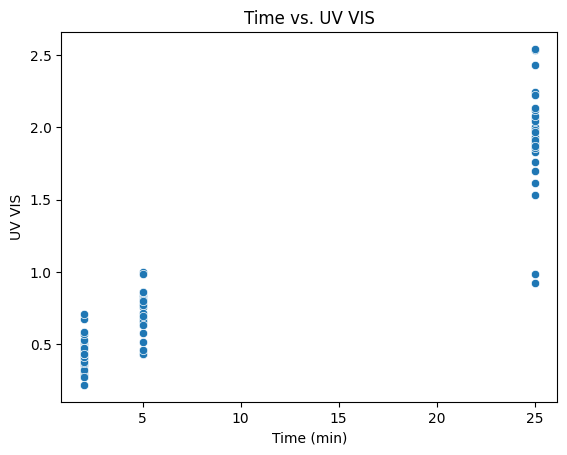

In [25]:
sns.scatterplot(data=df,x='Time(min)', y='UV VIS')
plt.title('Time vs. UV VIS')
plt.xlabel('Time (min)')
plt.ylabel('UV VIS')
plt.show()

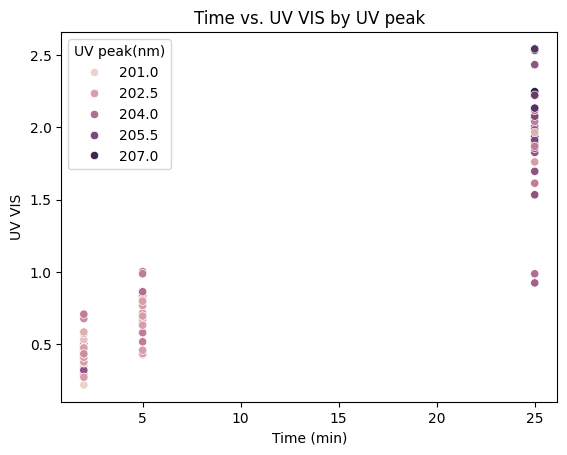

In [26]:
sns.scatterplot(data=df,x='Time(min)', y='UV VIS',hue='UV peak(nm)')
plt.title('Time vs. UV VIS by UV peak')
plt.xlabel('Time (min)')
plt.ylabel('UV VIS')
plt.show()

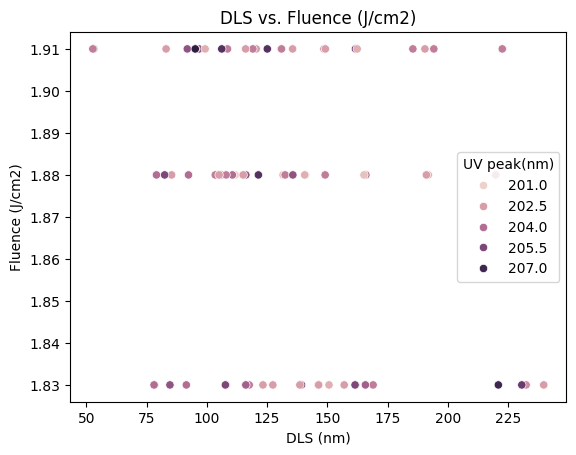

In [27]:
sns.scatterplot(data=df,x='DLS (nm)', y='Fluence (J/cm2)',hue='UV peak(nm)')
plt.title('DLS vs. Fluence (J/cm2)')
plt.xlabel('DLS (nm)')
plt.ylabel('Fluence (J/cm2)')
plt.show()

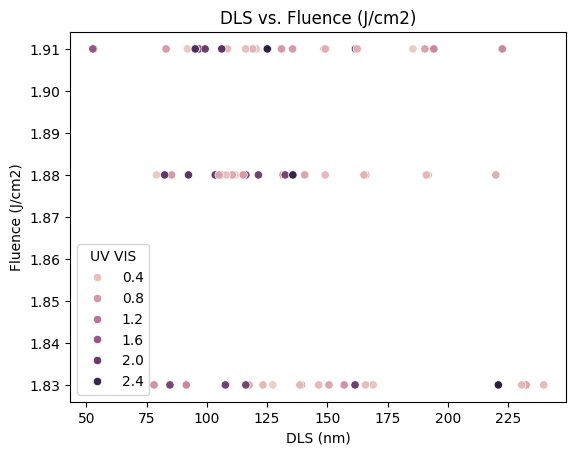

In [28]:
sns.scatterplot(data=df,x='DLS (nm)', y='Fluence (J/cm2)',hue='UV VIS')
plt.title('DLS vs. Fluence (J/cm2)')
plt.xlabel('DLS (nm)')
plt.ylabel('Fluence (J/cm2)')
plt.show()

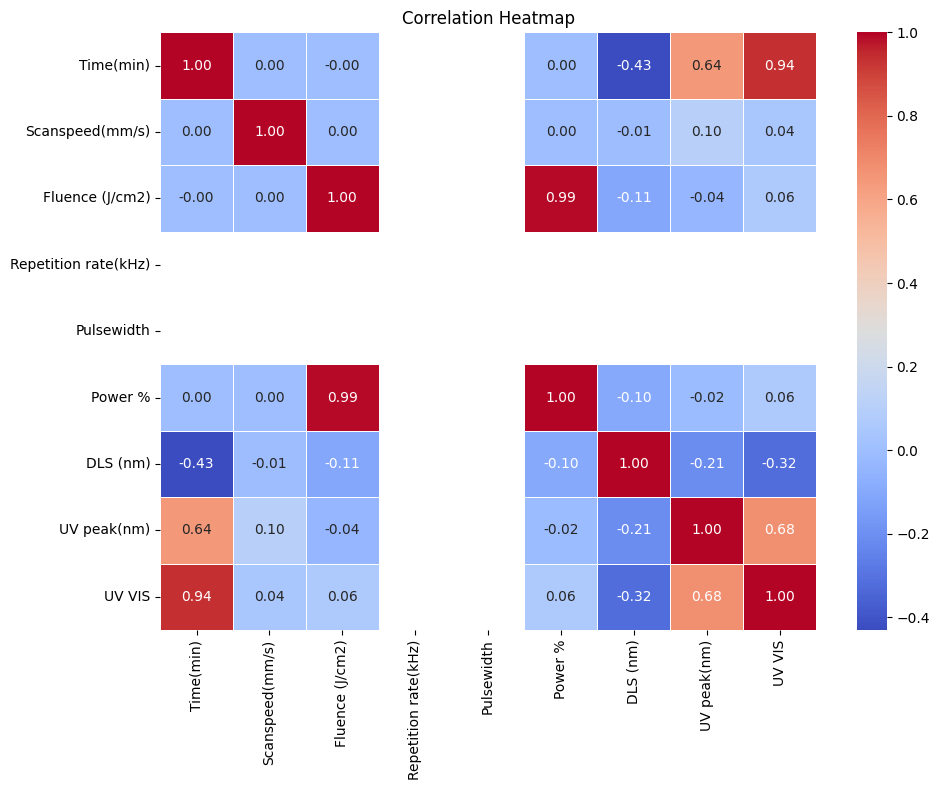

In [29]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

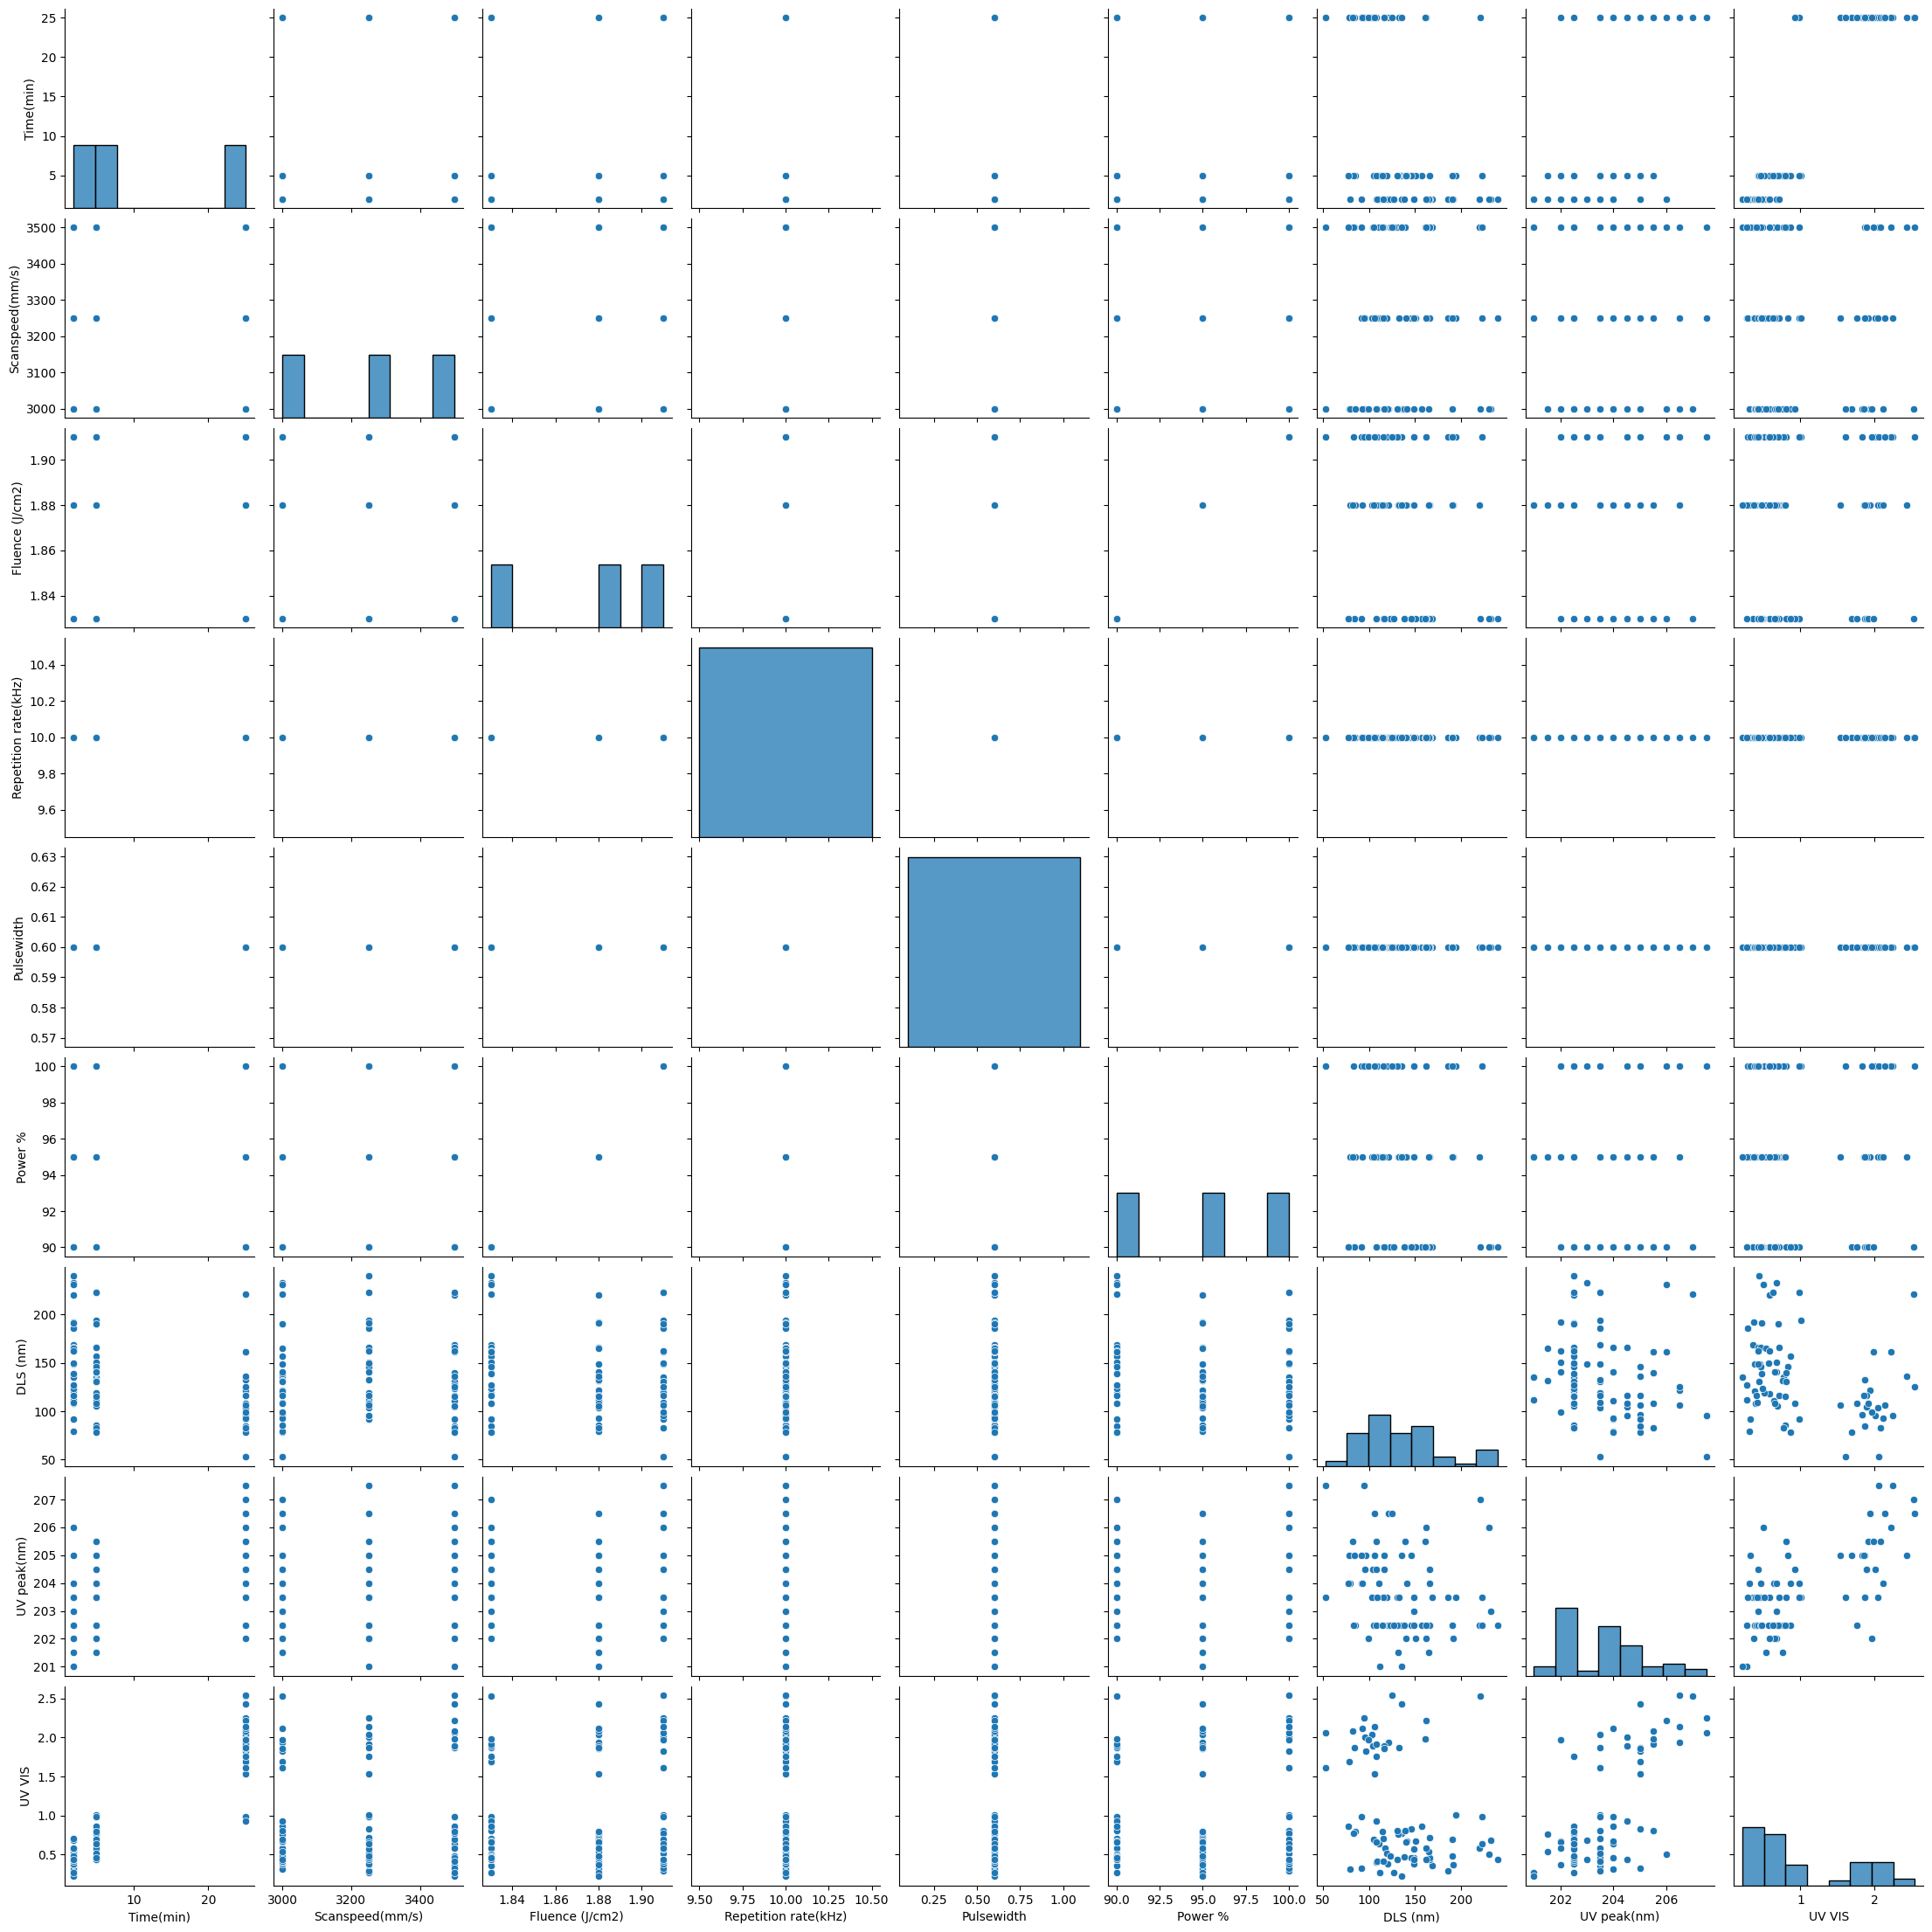

In [30]:
sns.pairplot(data=df)
plt.show()